# 第6章 期待値

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import *

#### 乱数シードの指定（テキスト掲載用）
拙著に掲載した標本路を再現するため，シードを明示しときます．本来は必要ないので，コメントアウトしてもよいです．

In [2]:
np.random.seed(321)

## 6.1 確率変数の期待値

## 6.1.2 密度関数 p(x) が未知の場合

### 標本平均

In [3]:
def SampleMean(Π):
    N = len(Π)
    if N == 0:
        return False #計算不可能
    else:
        return sum(Π)/len(Π)

#### 標本の例（平均０，分散１のガウス型乱数列にしときます）

In [4]:
Π1=randn(2000)

In [5]:
Π1

array([ 0.17251947,  1.63548253,  0.0373364 , ...,  0.04005617,
        2.36532508, -0.27772029])

標本数が有限なので，理論上の平均0には一致しません．

In [6]:
SampleMean(Π1)

-0.0003234867152780985

#### 同分布の別標本の場合

In [7]:
Π2=randn(2000)

別の標本なので，標本平均は変化します．

In [8]:
SampleMean(Π2)

0.0007589896765055609

標本数を変えた場合も，標本平均は変化します．

In [9]:
SampleMean(Π2[0:1900])

-0.0060991324799947715

### 標本分散

numpy.array の掛け算のチェック

In [10]:
np.array([1,2,3])**2

array([1, 4, 9])

#### 定義通りの実装

In [11]:
def SampleVariance(Π):
    m=SampleMean(Π)  #標本平均
    return SampleMean( (Π-m*np.ones_like(Π))**2 )

お試し

In [12]:
SampleVariance(Π2)

0.9878322517997097

## 6.1.3 標本平均の性質

### 大数の法則

In [13]:
Π = randn(20000)
Xn = [SampleMean(Π[0:i]) for i in range(1,len(Π))]

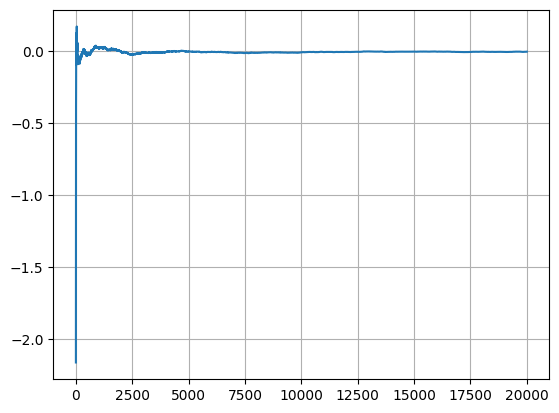

In [14]:
plt.plot(range(1,len(Π)),Xn)
plt.grid()

### 中心極限定理

ランダムサンプリングのやり方チェック

In [15]:
np.random.choice(Π, 5, replace=False) #重複なしのランダムサンプリング

array([-0.07232438, -0.36340346, -0.45956821, -1.74077106, -0.49327617])

異なるサンプルの平均値

In [16]:
def SampledMeans_of_n(Π, size_of_sample, num_of_mean):
    means = np.zeros((num_of_mean,2))
    for i in range(num_of_mean):
        sample = np.random.choice(Π, size_of_sample, replace=False)
        means[i,0] = size_of_sample
        means[i,1] = SampleMean(sample)
    return means

In [17]:
SampledMeans_of_n(Π,len(Π),5)

array([[ 2.00000000e+04, -3.58425848e-03],
       [ 2.00000000e+04, -3.58425848e-03],
       [ 2.00000000e+04, -3.58425848e-03],
       [ 2.00000000e+04, -3.58425848e-03],
       [ 2.00000000e+04, -3.58425848e-03]])

横軸：各標本のサイズ n; 縦軸：各標本の標本平均 

In [18]:
def SampledMeans(Π, step, num_of_mean):
    result = np.empty((0,2))
    for n in range(step, len(Π)+1, step):
        result = np.vstack((result,SampledMeans_of_n(Π, n, num_of_mean)))
    return result

In [19]:
SampledMeans(Π,5000,3)

array([[ 5.00000000e+03, -1.36025381e-02],
       [ 5.00000000e+03, -6.00653032e-03],
       [ 5.00000000e+03, -1.33754128e-02],
       [ 1.00000000e+04,  6.75166112e-03],
       [ 1.00000000e+04,  3.03172602e-03],
       [ 1.00000000e+04, -1.41190226e-03],
       [ 1.50000000e+04, -5.62044193e-03],
       [ 1.50000000e+04, -2.30987751e-03],
       [ 1.50000000e+04, -7.33924202e-03],
       [ 2.00000000e+04, -3.58425848e-03],
       [ 2.00000000e+04, -3.58425848e-03],
       [ 2.00000000e+04, -3.58425848e-03]])

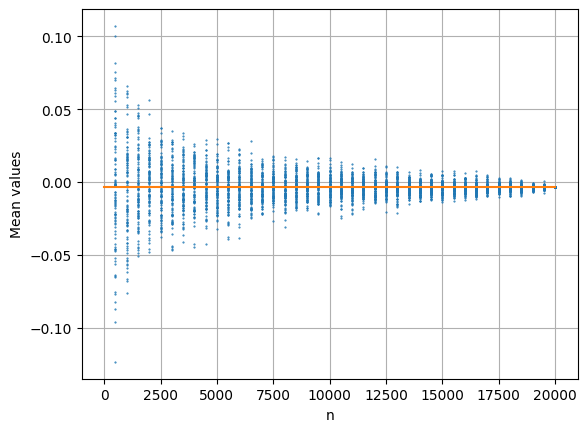

In [20]:
means = SampledMeans(Π,500,100)
plt.plot(means[:,0],means[:,1],".",markersize=1)
plt.plot([0,len(Π)],[SampleMean(Π),SampleMean(Π)]) #Π全体の標本平均
plt.xlabel("n")
plt.ylabel("Mean values")
plt.grid()

各標本のサイズ n の増大にともなって，平均値のばらつきが小さくなり，Πの標本平均に収束しています．<font color="red">ただし，各標本のサイズ（標本数）が有限なので，終端値（Πの標本平均）は理論的な平均0には一致しません．</font>

## 6.2 確率ベクトルの期待値

## 6.2.1 多変数の期待値

### 共分散

In [21]:
def Cov(X,Y):
    mx = SampleMean(X)
    my = SampleMean(Y)
    return SampleMean(X*Y)-mx*my

### 相関係数

In [22]:
def rho(X,Y):
    sx = np.sqrt(SampleVariance(X)) #Xの標準偏差
    sy = np.sqrt(SampleVariance(Y)) #Yの標準偏差
    return Cov(X/sx,Y/sy)

## 6.2.2 期待値に関する公式

X1とX2は個別に生成した標本です．あえて分布形を変えました．それらの差をX3とします．

In [23]:
X1 = rand(100000)  #区間[0,1]の一様乱数
X2 = randn(100000) #平均0分散1のガウス型乱数
X3 = X1 - X2

#### 算法 6.4 (平均の公式)

(1) 足してから平均

In [24]:
SampleMean(np.sin(X1) + np.exp(X3))

3.281323613682723

平均してから足す

In [25]:
SampleMean(np.sin(X1)) + SampleMean(np.exp(X3))

3.281323613682708

<font color="red">※値の誤差は，計算順序の違いで計算機誤差が変化したためです．</font>

(2) 定数倍してから平均

In [26]:
SampleMean(5 * np.cos(X1))

4.207553684036071

平均してから定数倍

In [27]:
5 * SampleMean(np.cos(X1))

4.2075536840361165

#### 算法 6.5 (分散の公式)

(1)

In [28]:
VX1 = SampleMean(X1**2) - SampleMean(X1)**2
VX1 - SampleVariance(X1)

-1.7486012637846216e-15

(2)

In [29]:
CovX1X3 = SampleMean(X1*X3) - SampleMean(X1)*SampleMean(X3)
CovX1X3 - Cov(X1,X3)

0.0

(3)

In [30]:
s1 = np.sqrt(SampleVariance(X1))
s3 = np.sqrt(SampleVariance(X3))
rhoX1X3 = Cov(X1,X3)/(s1*s3)
rhoX1X3 - rho(X1,X3)

1.73749903353837e-14

<font color="red">※計算機の計算結果において，$10^{-14}$程度の値は0を意味します．</font>

## 6.3 共分散と相関

### 共分散

互いに独立なX1とX2の共分散は0になります（標本数が有限なので，ぴったり0にはなりません）．

In [31]:
Cov(X1,X2)

0.0010474315428983087

X3 = X1 - X2 には，X1やX2の変動が混合されています．したがって，このX3は，X1やX2と独立ではありません．
このような場合の共分散は非ゼロになります．

In [32]:
Cov(X1,X3)

0.0826466066554585

In [33]:
Cov(X2,X3)

-1.00184864009962

### 相関係数

互いに独立なX1とX2の相関係数は0になります（標本数が有限なので，ぴったり0にはなりません）．

In [34]:
rho(X1,X2)

0.0036153506188351496

独立でない場合の相関係数は，$\rho\neq0$ かつ $-1\leq\rho\leq1$ の値をとります．

In [35]:
rho(X1,X3)

0.2743240847639806

In [36]:
rho(X2,X3)

-0.9606392374435325

## 6.3.2 無相関だが独立でない例

In [37]:
X4 = randn(1000000) #平均0分散1のガウス型乱数
X5 = X4*X4
rho(X4,X5)

0.0009344193575828348

## 6.4 条件付き期待値

## 6.4.1 関数としての定義

有限個の実数値の標本に対して，このタイプの条件付き期待値を定めるのは困難です（だから難解なのかもしれませんね）．実例を作ってみましょう．

### 定義通りの実装

In [38]:
def SampleConditionalMean(XX, y_value):
    sampled_idx = np.where(XX[:,1]==y_value)[0]
    x_values = XX[sampled_idx,0]
    return SampleMean(x_values),x_values

#### 既知の離散値の標本に対して

条件付き期待値を求めるこの関数は，既知の離散値の標本に対しては，ある程度うまく機能します．

In [39]:
XXint = np.array([[-1,1],[1,1],[3,2],[5,2],[6,1]])
XXint

array([[-1,  1],
       [ 1,  1],
       [ 3,  2],
       [ 5,  2],
       [ 6,  1]])

In [40]:
SampleConditionalMean(XXint,1)

(2.0, array([-1,  1,  6]))

In [41]:
SampleConditionalMean(XXint,2)

(4.0, array([3, 5]))

#### 未知の実数値の標本に対して

しかし，SampleConditionalMean(XX, y) は，実数値関数 f(y) のようには機能しません．標本 XX の第2成分がランダムな実数値の場合，これが<font color="red">勝手に選んだ確定値 y</font> にヒットする確率は一般的には0だからです．平均すべき値が存在しなければ，平均は計算できません．

実数値（浮動小数点値）の実例をみてみましょう．

In [42]:
def getRandomVector(n_of_sample):
    XX = np.zeros([n_of_sample,2])
    XX[:,0] = randn(n_of_sample) #第1成分はガウス型乱数
    XX[:,1] = XX[:,0] + randn(n_of_sample) #第2成分は第1成分と相関のあるガウス型乱数
    return XX

In [43]:
XX_3 = getRandomVector(3)
XX_3

array([[-0.47088186, -1.1156735 ],
       [-1.51890715, -0.09814011],
       [-1.1308966 ,  0.0971098 ]])

このX_3で計算を進めると，平均値はFalseとなります．これは平均すべき対象が空だったことを意味します．実際arrayは空です．

In [44]:
SampleConditionalMean(XX_3,2.0)

(False, array([], dtype=float64))

標本数を増やしても，対象が空になってだめです．

Text(0, 0.5, 'X2')

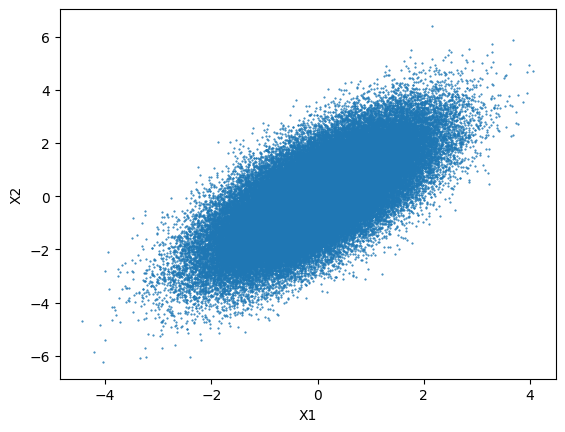

In [45]:
XX_huge = getRandomVector(100000)
plt.plot(XX_huge[:,0],XX_huge[:,1],".",markersize=1)
plt.xlabel('X1')
plt.ylabel('X2')

In [46]:
SampleConditionalMean(XX_huge,2.0)

(False, array([], dtype=float64))

実際に存在する値を抽出して与えると一応，期待値は計算されます．しかし，それ自身にしかヒットしておらず，１個で平均？した結果であることが分かります．

In [47]:
XX_huge[1000,:]

array([0.53563877, 1.97174106])

In [48]:
XX_huge[1000,1]

1.9717410602747432

In [49]:
SampleConditionalMean(XX_huge,XX_huge[1000,1])

(0.5356387720173378, array([0.53563877]))

### 区間による実装

条件 y を区間で与えると，条件付き期待値の関数形を大まかに可視化できます．

In [50]:
def SampleConditionalMean_by_interval(XX, y_value_min, y_value_max, nstep):
    ys = np.linspace(y_value_min, y_value_max, nstep+1)
    result = np.empty((0,2))
    for i in range(nstep):
        y = (ys[i]+ys[i+1])*0.5
        sampled_idx = np.where((ys[i]<=XX[:,1]) & (XX[:,1]<ys[i+1]))[0]
        x_values = XX[sampled_idx,0]
        mean = SampleMean(x_values)
        if mean != False:
            result = np.vstack((result,np.array([y,mean])))
    return result

Text(0, 0.5, '$E[X|y]$')

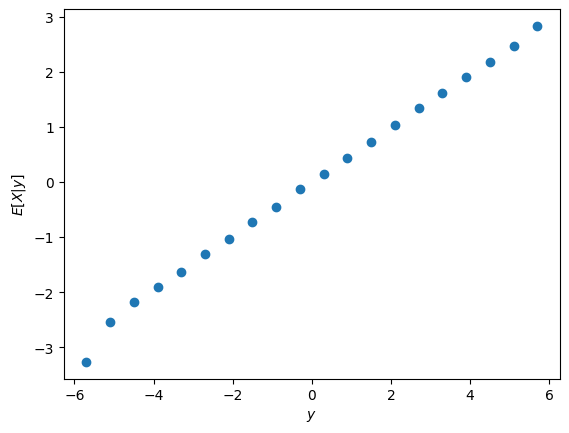

In [51]:
scm_int = SampleConditionalMean_by_interval(XX_huge, -6, 6, 20)
plt.plot(scm_int[:,0], scm_int[:,1], 'o')
plt.xlabel('$y$')
plt.ylabel('$E[X|y]$')

### 算法 6.10

In [52]:
def ConditionalMeanFunc(XX, y): #mx, my, C12, vy を引数にしたほうが速いです
    X = XX[:,0]
    Y = XX[:,1]
    mx = SampleMean(X)
    my = SampleMean(Y)
    C12 = Cov(X,Y)
    vy = SampleVariance(Y)
    return mx + (C12/vy)*(y - my)

In [53]:
ConditionalMeanFunc(XX_huge,1)

0.5005184254146589

### 図6.1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


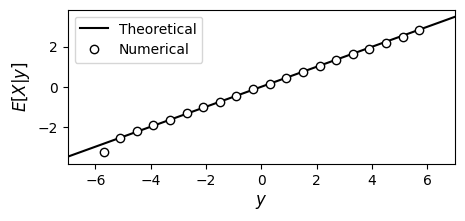

In [54]:
ys = np.linspace(-7, 7, 20)
means = [ConditionalMeanFunc(XX_huge,y) for y in ys]

plt.figure(figsize=(5,2))
plt.xlim([-7,7])
plt.plot(ys, means, 'k-', label='Theoretical')
plt.plot(scm_int[:,0], scm_int[:,1], 'o', markeredgecolor='k', markerfacecolor='w', label='Numerical')
plt.legend()
plt.xlabel('$y$', fontsize=12)
plt.ylabel('$E[X|y]$', fontsize=12)

plt.savefig('figs/Ch06-CondMean.eps', bbox_inches='tight')

実線が算法6.10による結果，☓点が上記「区間による実装」による近似です．